In [1]:
import numpy as np
import math
import gym
import matplotlib.pyplot as plt
from collections import defaultdict

## Helper Functions

In [2]:
def e_greedy_policy(epsilon, action_values):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        action = np.argmax(action_values)
    return action

def run_episode(Q, epsilon, max_t=10000, render=False):
    trajectory = []
    state = env.reset()
    for t in range(max_t):
        if render:
            env.render()
        action = e_greedy_policy(epsilon, Q[state])
        next_state, reward, done, info = env.step(action)
        trajectory.append((state,action,reward))
        state = next_state
        if done:
            break
    states, actions, rewards = zip(*trajectory)
    return states, actions, rewards

# Learning Algorithms

## Double Q-Learning

In [3]:
def Double_Q_Learning(env, num_episodes, n_avg, alpha, EPSILON, gamma, epsilon_final=0.05, decay_rate=1, decay_threshold=1000000, max_t=10000, reward_modifier=None):
    Q1 = defaultdict(lambda: np.zeros(env.nA))
    Q2 = defaultdict(lambda: np.zeros(env.nA))
    episode_rewards = [] 
    rolling_avg = []
    epsilon = EPSILON
    decay_epsilon = False
    
    for i_episode in range(num_episodes):
        state = env.reset()
        reward_sum = 0
        for t in range(max_t):
            action = e_greedy_policy(epsilon, Q1[state]+Q2[state])
            next_state, reward, done, info = env.step(action)
            reward_sum += reward
            if reward_modifier is not None:
                reward = reward_modifier[env.desc.flatten()[next_state]]
            
            if np.random.random_sample() < 0.5:
                Q1[state][action] = Q1[state][action] + alpha*(reward + gamma*Q2[next_state][np.argmax(Q1[next_state])] - Q1[state][action])
            else:
                Q2[state][action] = Q2[state][action] + alpha*(reward + gamma*Q1[next_state][np.argmax(Q2[next_state])] - Q2[state][action])
            
            state = next_state
            if done:
                if reward_sum >= decay_threshold: 
                    decay_epsilon = True
                break
        episode_rewards.append(reward_sum)
        
        if decay_epsilon:
            epsilon = max(epsilon*decay_rate, epsilon_final)
            
        if i_episode > n_avg:
            rolling_avg.append(np.mean(episode_rewards[-n_avg:]))
    return episode_rewards, (Q1,Q2), rolling_avg

# Part 2: Frozen Lake

In [4]:
env = gym.make("FrozenLake-v0")
env.seed(0)
np.random.seed(0)

2a. Implement one of the following to learn the Frozen Lake task in OpenGym.

In [23]:
num_episodes = 15000
alpha = 0.1
epsilon = 1
gamma = 0.99
n_avg = 100

Q_Learning_rewards_a, Q_Learning_q_a, Q_Learning_avgs_a = Double_Q_Learning(env, num_episodes, n_avg, alpha, epsilon, gamma)

In [24]:
total_rewards = []
for i in range(1000):
    states, actions, rewards = run_episode(Q_Learning_q_a[1], 0, 100, False)
    total_rewards.append(sum(rewards))
print(np.mean(total_rewards))

0.752


In [7]:
#states, actions, rewards = run_episode(Q_Learning_q_a[1], 0, 100, True)

2b. What is the reward function for the Frozen Lake task? How does this affect your
agent’s ability to learn? How might you make things easier for your agent? Modify the
reward your agent receives from its actions. Can you achieve better performance?

In [8]:
reward_modifier ={
b'S': -0.1,
b'F': -0.1,
b'H': -10,
b'G': 10 }

num_episodes = 7500
alpha = 0.1
epsilon = 1
gamma = 0.99
n_avg = 100

Q_Learning_rewards_b, Q_Learning_q_b, Q_Learning_avgs_b = Double_Q_Learning(env, num_episodes, n_avg, alpha, epsilon, gamma, reward_modifier=reward_modifier)

In [9]:
total_rewards = []
for i in range(1000):
    states, actions, rewards = run_episode(Q_Learning_q_b[1], 0, 100, False)
    total_rewards.append(sum(rewards))
print(np.mean(total_rewards))

0.732


In [10]:
#states, actions, rewards = run_episode(Q_Learning_q_b[1], 0, 100, True)

2c. Now let’s achieve better performance without cheating. Frozen Lake is about
exploration. How could you promote better exploration? What’s the best performance
you think you can get, and why?

In [27]:
num_episodes = 15000
alpha = 0.1
epsilon = 1
gamma = 0.99
n_avg = 100

Q_Learning_rewards_c, Q_Learning_q_c, Q_Learning_avgs_c = Double_Q_Learning(env, num_episodes, n_avg, alpha, epsilon, gamma, epsilon_final=0.05, decay_rate=0.999, decay_threshold=1.0)

In [28]:
total_rewards = []
for i in range(1000):
    states, actions, rewards = run_episode(Q_Learning_q_c[1], 0, 100, False)
    total_rewards.append(sum(rewards))
print(np.mean(total_rewards))

0.731


In [13]:
#states, actions, rewards = run_episode(Q_Learning_q_c[1], 0, 100, True)

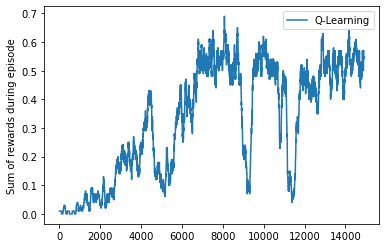

In [29]:
plt.plot(Q_Learning_avgs_c, label='Q-Learning')
plt.ylabel('Sum of rewards during episode')
plt.legend()
plt.savefig('Figures/A3P2-2c.png')
plt.show()